## Use Maximium Likelihood Estimation to estimate the parameter of a Gaussian distribution ##
https://towardsdatascience.com/probability-concepts-explained-maximum-likelihood-estimation-c7b4342fdbb1
and StatsQuest MLE on Normal Distribution
https://www.projectrhea.org/rhea/index.php/Maximum_Likelihood_Estimation_Analysis_for_various_Probability_Distributions

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [93]:
n = 10000
mu = np.random.randint(30,50) # generate a random number as mean from 0 to 10
std = np.random.randint(3,25) # generate a random number as standard deviation from 5 to 15
x = np.random.normal(mu, std, n) #simulate 100 instances from the normal distribution

In [94]:
print(mu)
print(std)
print(x[0:10])

33
6
[43.95911136 35.67942554 27.21414357 29.46924036 31.17460389 36.32607989
 36.74475015 28.93953104 39.87363342 22.07480896]


In [95]:
avg = np.mean(x)
sig = np.std(x)
print(avg, sig)

32.95809938653252 5.904594570419897


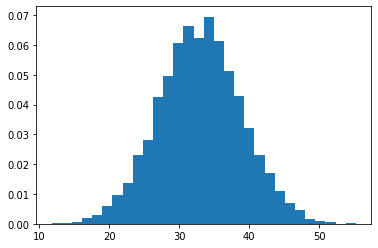

In [96]:
count, bins, ignored = plt.hist(x, 30, density=True)
plt.show()

In [97]:
# likelihood calculation for normal distribution 
def likelihood(a, mu, std):
    return math.exp( -(a - mu) ** 2 / (2 * std ** 2))/math.sqrt(2 * math.pi * std ** 2)

In [98]:
def MLE(data, start, end, mu=None, std=None):
    
    estimator = []
    xaxis = []
    
    if (mu == None) & (std != None):  # estimate max mu with a fixed std
        for i in range(10*start, 10*end, 2):
            mu = i/10
            xaxis.append(mu) # use for plot of x-axis 
            lh = [likelihood(x, mu, std) for x in data] # std can be set as 10
            log_transformation = [np.log10(i) for i in lh]
            product = sum(log_transformation) 
            estimator.append(product)
        
        
    elif (std == None) & (mu != None): # estimate max std with a fixed mu
        for i in range(10*start, 10*end, 2):
            std = i/10
            xaxis.append(std)      
            lh = [likelihood(x, mu, std) for x in data] # std can be set as 10
            log_transformation = [np.log10(i) for i in lh]
            product = sum(log_transformation) 
            estimator.append(product)
    else:
        print("Parameter setting for mu or std is not right.")
        return 0,0
    

    return xaxis, estimator


In [99]:
def find_max(x, y): # input x,y are both lists; x is samples range and y is the log likelihood product
    maxi = -100000 # make sure this is not bigger than all values 
    max_index = 0
    for i, num in enumerate(y):
        if num > maxi:
            maxi = num
            max_index = i
    return maxi, x[max_index]

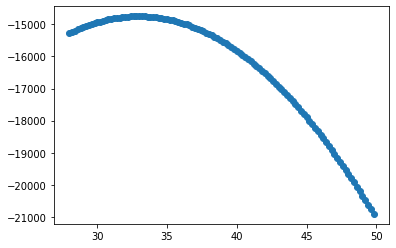

In [100]:
c,d = MLE(x,28,50, std = 10) # estimate mean; this has to go first to ensure the right estimation of std 
plt.scatter(c, d)
plt.show()

In [101]:
max_likelihood, mean = find_max(c,d)
print(mean)

33.0


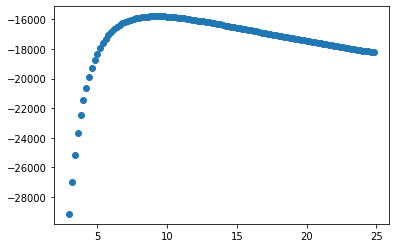

In [105]:
a,b = MLE(x,3,25,mu = mean) # estimate std with the right mean from previous; this is because the estimate of std requires mean estimate 
plt.scatter(a, b)
plt.show()

In [106]:
max_likelihood, stdev = find_max(a,b)
print(stdev)

9.2


########################################################################################################

In [70]:
estimator = []
xaxis = []
for i in range(300, 510, 2):
    m = i/10
    xaxis.append(m)
    ll = [likelihood(a, m, 10) for a in x] # set std as 10
    log_tran = [np.log10(i) for i in ll]
    product = sum(log_tran)
    estimator.append(product)

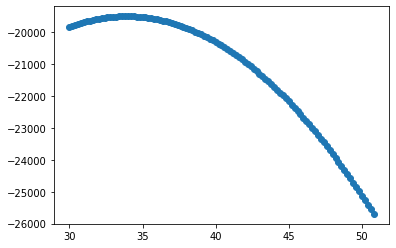

In [71]:
plt.scatter(xaxis, estimator)
# plt.ylim([min(estimator), max(estimator)])
plt.show()

In [14]:
estimator = []
xaxis = []
for i in range(300, 510, 2):
    m = i/10
    xaxis.append(m) # use for plot of x-axis 
    ll = [likelihood(a, m, 10) for a in x] # set std as 10
    product = np.prod(ll) * (10 ** 200) # use a scalar to make the number easier to interpret; no real meanings 
    estimator.append(product)

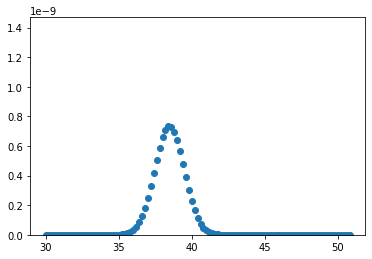

In [15]:
plt.scatter(xaxis, estimator)
plt.ylim([min(estimator)*0.7, max(estimator)*2])
plt.show()

In [16]:
std_estimator = []
xaxis = []
for s in range(30, 250, 2):
    std = s/10
    xaxis.append(std)
    ll = [likelihood(a, mu, std) for a in x] # set std as 10
    product = np.prod(ll)* (10 ** 200)
    std_estimator.append(product)

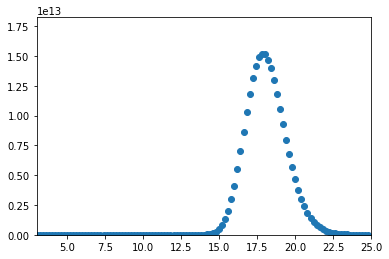

In [17]:
plt.scatter(xaxis, std_estimator)
plt.xlim([3,25])
plt.ylim([min(std_estimator), max(std_estimator)*1.2])
plt.show()

In [19]:
len(b)
len(std_estimator)

110

In [21]:
max = max_index = 0
for i, num in enumerate(b):
    if num > max:
        max = num
        max_index = i
print(max, max_index)

621112669.2842809 84


In [22]:
max = max_index = 0
for i, num in enumerate(std_estimator):
    if num > max:
        max = num
        max_index = i
print(max, max_index)

15190127424872.174 74
